In [1]:
import pandas as pd #modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import pathlib
from pathlib import Path
from datetime import datetime

In [2]:
directory = Path('./data_plots') #get current work directory
directory.mkdir(exist_ok=True)
matching_files = list(directory.glob("*obj*.xlsx"))  # Busca archivos que contengan 'obj' y tengan extensión .xlsx
print("Archivos encontrados:", matching_files)

Archivos encontrados: [WindowsPath('data_plots/test_obj_aperturas_nariz.xlsx'), WindowsPath('data_plots/test_obj_causa_rechazos.xlsx')]


In [3]:
dict_data_pointer={} #dict to store files as dfs
for i in matching_files: # Read the Excel file 
    file_path = str(i)  # Update this with the path
    df = pd.read_excel(file_path)
    print(file_path)
    df_name=file_path.split("obj_")[1].split(".")[0] #split str with "obj_" and the  "." char and take the file name
    date_col="Fecha" #default col name with dates
    if "aperturas" in file_path.lower(): #if excel name file contains "aperturas", change col name with dates
        date_col="Fecha Paro"
    row_numbers_nan = df.index[df[date_col].isna()].tolist() # Get the row numbers where 'Fecha' or 'Fecha Paro' is NaN
    row_numbers = list(set(row_numbers_nan)) # lists of row with nan numbers
    filtered_df = df.drop(index=row_numbers) # Filter the DataFrame to keep only the rows that are not in row_numbers
    dict_data_pointer[f"{df_name}"]=filtered_df #store filtered df in dictionary data pointer
print(list(dict_data_pointer.keys())) #see keys on dictionary to check callability

data_plots\test_obj_aperturas_nariz.xlsx
data_plots\test_obj_causa_rechazos.xlsx
['aperturas_nariz', 'causa_rechazos']


In [4]:
df_root=dict_data_pointer['aperturas_nariz']
df_root[df_root["Fecha Paro"]=="NaT"]

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1


In [5]:
df_pro=df_root[df_root["Modo de Fallo"].str.contains("PRO")]
df_pro.set_index([pd.Index(range(len(df_pro)))],inplace=True)
df_pro["Fecha Paro"]=df_pro["Fecha Paro"].astype("str") #
df_pro['Fecha Paro'][0]

C:\Users\jdbs1\AppData\Local\Temp\ipykernel_8968\3300177678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro["Fecha Paro"]=df_pro["Fecha Paro"].astype("str") #


'2025-01-02'

# Drop duplicate apertures

In [6]:
dates_ar=[date for date in df_pro["Fecha Paro"].unique()]
dates_ar

['2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08']

In [7]:
list_dropped_idx_rows=[]
for date_ar in dates_ar:
    print(date_ar)
    df_seeker=df_pro.loc[df_pro["Fecha Paro"]==date_ar] #filter by date
    rows_df_seeker=df_seeker.index #get idx of df for current date
    last_row=rows_df_seeker[-1] #to avoid out of range
    print(last_row)
    for row in rows_df_seeker:
        print(row)
        if row==last_row:
            continue #jump to next date
        if df_seeker.at[row,"Hora Final"]==df_seeker.at[row+1,"Hora Inicial"]:
            list_dropped_idx_rows.append(row+1) #add idx to be dropped
    print("idxs to drop are {}".format(list_dropped_idx_rows))
df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date
df_pro

2025-01-02
2
0
1
2
idxs to drop are [1]
2025-01-03
10
3
4
5
6
7
8
9
10
idxs to drop are [1, 8]
2025-01-04
12
11
12
idxs to drop are [1, 8]
2025-01-05
16
13
14
15
16
idxs to drop are [1, 8]
2025-01-06
23
17
18
19
20
21
22
23
idxs to drop are [1, 8, 20]
2025-01-07
37
24
25
26
27
28
29
30
31
32
33
34
35
36
37
idxs to drop are [1, 8, 20, 26, 30, 31, 36]
2025-01-08
41
38
39
40
41
idxs to drop are [1, 8, 20, 26, 30, 31, 36, 40]


C:\Users\jdbs1\AppData\Local\Temp\ipykernel_8968\366385708.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date


,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
0,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-02,20:02:00,20:09:00,400 FORMACION Y PREPRENSA,VARIACION HUMEDAD - PRO,Se abrea nariz y se evacúa la fibra,6,3,11 TAPAS,152426
2,CRUDO,"600 - CORTE, ENFRIAMIENTO & APILADO",PRODUCCIÓN,2025-01-02,20:15:00,20:31:00,600.631 SIERRA DIAGONAL,TABLERO EXPLOTADO - PRO,Se pierdesecuencia en la sierra diagonal debid...,16,3,11 TAPAS,152426
3,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:05:00,21:16:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,Sensor de cadena lado de operación de la cadena,11,1,9,152433
4,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:18:00,21:19:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,Evacuación del tablero,1,1,9,152433
5,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:20:00,21:42:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,"Evacuación del tablero, limpieza de sensor de ...",22,1,9,152433
6,CRUDO,050 - GENERACION DE ASTILLA,PRODUCCIÓN,2025-01-03,22:12:00,22:27:00,110.111 DETECTOR DE METALES ANTES DEL REFINO,DETECCIÓN DE METAL - PRO,"Detector de metales, perdida de nivel prestimi...",15,1,9,152433
7,CRUDO,300 - SECADO PRIMERA Y SEGUNDA ETAPA,PRODUCCIÓN,2025-01-03,23:02:00,23:03:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,VARIACION HUMEDAD - PRO,Se presenta bache de explotados por alta humed...,1,1,9,152433
9,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,00:00:00,00:09:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,VARIACION HUMEDAD - PRO,Se presenta bache de explotados por alta humed...,9,1,9,152433
10,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-03,14:05:00,14:08:00,400.412 DETECTOR DE METALES BANDA DE FORMACION,DETECCIÓN DE METAL - PRO,Se activa sistema de seguridad por presencia d...,3,3,9,152433
11,CRUDO,"600 - CORTE, ENFRIAMIENTO & APILADO",PRODUCCIÓN,2025-01-04,08:30:00,08:40:00,600.616 CARRO DE TRANSFERENCIA,SENSOR OBSTRUIDO - PRO,tuvimos un paro de la linea por activacion de ...,10,2,9,152162


In [8]:
df_count_fail_mode_equipment=df_pro.groupby(by=["Fecha Paro","Modo de Fallo","Descripción Equipo"]).count().loc[:,"Linea"]
df_count_fail_mode_equipment

Fecha Paro  Modo de Fallo                          Descripción Equipo                            
2025-01-02  TABLERO EXPLOTADO - PRO                600.631 SIERRA DIAGONAL                           1
            VARIACION HUMEDAD - PRO                400 FORMACION Y PREPRENSA                         1
2025-01-03  DETECCIÓN DE METAL - PRO               110.111 DETECTOR DE METALES ANTES DEL REFINO      1
                                                   400.412 DETECTOR DE METALES BANDA DE FORMACION    1
            SENSOR OBSTRUIDO - PRO                 500 PRENSA DIEFFENBACHER                          3
            VARIACION HUMEDAD - PRO                300 SECADO PRIMERA Y SEGUNDA ETAPA                2
2025-01-04  LIMPIEZA FILTRO - PRO                  250.268 BOMBA DOSIFICACION DE AGUA                1
            SENSOR OBSTRUIDO - PRO                 600.616 CARRO DE TRANSFERENCIA                    1
2025-01-05  SENSOR OBSTRUIDO - PRO                 500 PRENSA DIEFFENBACHER   

In [9]:
multi_index_from_df=list(df_count_fail_mode_equipment.index)
multi_index_from_df

[('2025-01-02', 'TABLERO EXPLOTADO - PRO', '600.631 SIERRA DIAGONAL'),
 ('2025-01-02', 'VARIACION HUMEDAD - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-01-03',
  'DETECCIÓN DE METAL - PRO',
  '110.111 DETECTOR DE METALES ANTES DEL REFINO'),
 ('2025-01-03',
  'DETECCIÓN DE METAL - PRO',
  '400.412 DETECTOR DE METALES BANDA DE FORMACION'),
 ('2025-01-03', 'SENSOR OBSTRUIDO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-03',
  'VARIACION HUMEDAD - PRO',
  '300 SECADO PRIMERA Y SEGUNDA ETAPA'),
 ('2025-01-04', 'LIMPIEZA FILTRO - PRO', '250.268 BOMBA DOSIFICACION DE AGUA'),
 ('2025-01-04', 'SENSOR OBSTRUIDO - PRO', '600.616 CARRO DE TRANSFERENCIA'),
 ('2025-01-05', 'SENSOR OBSTRUIDO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06',
  'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
  '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06', 'AJUSTE PARAMETROS - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06', 'DETECCIÓN DE METAL - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-01-06', 'DETECCIÓN DE METAL - P

In [10]:
dates=sorted(list(set([multi_index[0] for multi_index in multi_index_from_df ])))
dates

['2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08']

In [11]:
fail_modes=sorted(list(set([multi_index[1] for multi_index in multi_index_from_df ])))
fail_modes

['ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
 'AJUSTE PARAMETROS - PRO',
 'ATASCO MATERIAL - PRO',
 'DETECCIÓN DE METAL - PRO',
 'LIMPIEZA FILTRO - PRO',
 'SENSOR OBSTRUIDO - PRO',
 'TABLERO EXPLOTADO - PRO',
 'VARIACION FLUJO - PRO',
 'VARIACION HUMEDAD - PRO']

In [12]:
equipments=sorted(list(set([multi_index[2] for multi_index in multi_index_from_df ])))
equipments

['100.118 ELEVADOR DE CANGILONES',
 '110.111 DETECTOR DE METALES ANTES DEL REFINO',
 '250.268 BOMBA DOSIFICACION DE AGUA',
 '300 SECADO PRIMERA Y SEGUNDA ETAPA',
 '400 FORMACION Y PREPRENSA',
 '400.403.05 DESMENUZADOR #5 BUNKER',
 '400.412 DETECTOR DE METALES BANDA DE FORMACION',
 '400.415 BANDA DE FORMACION',
 '500 PRENSA DIEFFENBACHER',
 '600.610 STACKER',
 '600.614 APILADOR DE CALIBRES BAJOS (STACKING)',
 '600.616 CARRO DE TRANSFERENCIA',
 '600.631 SIERRA DIAGONAL']

In [13]:
df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)
df_stacked_data

C:\Users\jdbs1\AppData\Local\Temp\ipykernel_8968\558380705.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)


,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE PARAMETROS - PRO,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - PRO,LIMPIEZA FILTRO - PRO,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO
2025-01-02,0,0,0,0,0,0,0,0,0
2025-01-03,0,0,0,0,0,0,0,0,0
2025-01-04,0,0,0,0,0,0,0,0,0
2025-01-05,0,0,0,0,0,0,0,0,0
2025-01-06,0,0,0,0,0,0,0,0,0
2025-01-07,0,0,0,0,0,0,0,0,0
2025-01-08,0,0,0,0,0,0,0,0,0


In [14]:
dict_stacked_values={fail_mode:[""]*len(dates) for fail_mode in fail_modes}
for date,fail_mode,equip in multi_index_from_df:
    print(date,fail_mode)
    count_by_date_by_fail_mode_by_equipment= df_count_fail_mode_equipment[date,fail_mode].sum() # df_count_fail_mode_equipment.at[date,fail_mode,equip]
    print(count_by_date_by_fail_mode_by_equipment)
    value_label_plus_equip=str(count_by_date_by_fail_mode_by_equipment) # equip.split(" ")[0]+":"+
    print(value_label_plus_equip)
    df_stacked_data.loc[date,fail_mode]=count_by_date_by_fail_mode_by_equipment
    idx_date=dates.index(date)
    dict_stacked_values[fail_mode][idx_date]=value_label_plus_equip

2025-01-02 TABLERO EXPLOTADO - PRO
1
1
2025-01-02 VARIACION HUMEDAD - PRO
1
1
2025-01-03 DETECCIÓN DE METAL - PRO
2
2
2025-01-03 DETECCIÓN DE METAL - PRO
2
2
2025-01-03 SENSOR OBSTRUIDO - PRO
3
3
2025-01-03 VARIACION HUMEDAD - PRO
2
2
2025-01-04 LIMPIEZA FILTRO - PRO
1
1
2025-01-04 SENSOR OBSTRUIDO - PRO
1
1
2025-01-05 SENSOR OBSTRUIDO - PRO
4
4
2025-01-06 ACCIONAMIENTO SISTEMA SEGURIDAD - PRO
2
2
2025-01-06 AJUSTE PARAMETROS - PRO
1
1
2025-01-06 DETECCIÓN DE METAL - PRO
3
3
2025-01-06 DETECCIÓN DE METAL - PRO
3
3
2025-01-07 AJUSTE PARAMETROS - PRO
1
1
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 ATASCO MATERIAL - PRO
8
8
2025-01-07 VARIACION FLUJO - PRO
1
1
2025-01-08 ATASCO MATERIAL - PRO
1
1
2025-01-08 DETECCIÓN DE METAL - PRO
1
1
2025-01-08 VARIACION FLUJO - PRO
1
1


In [15]:
df_stacked_data

,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE PARAMETROS - PRO,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - PRO,LIMPIEZA FILTRO - PRO,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO
2025-01-02,0,0,0,0,0,0,1,0,1
2025-01-03,0,0,0,2,0,3,0,0,2
2025-01-04,0,0,0,0,1,1,0,0,0
2025-01-05,0,0,0,0,0,4,0,0,0
2025-01-06,2,1,0,3,0,0,0,0,0
2025-01-07,0,1,8,0,0,0,0,1,0
2025-01-08,0,0,1,1,0,0,0,1,0


In [16]:
list_count_by_fail_mode_per_date=list(df_stacked_data.T.values)
weight_counts={" ".join(fail_mode.split("-")[0].split()).lower():list_count_by_fail_mode_per_date[idx] for idx,fail_mode in enumerate(fail_modes)}
weight_counts

{'accionamiento sistema seguridad': array([0, 0, 0, 0, 2, 0, 0]),
 'ajuste parametros': array([0, 0, 0, 0, 1, 1, 0]),
 'atasco material': array([0, 0, 0, 0, 0, 8, 1]),
 'detección de metal': array([0, 2, 0, 0, 3, 0, 1]),
 'limpieza filtro': array([0, 0, 1, 0, 0, 0, 0]),
 'sensor obstruido': array([0, 3, 1, 4, 0, 0, 0]),
 'tablero explotado': array([1, 0, 0, 0, 0, 0, 0]),
 'variacion flujo': array([0, 0, 0, 0, 0, 1, 1]),
 'variacion humedad': array([1, 2, 0, 0, 0, 0, 0])}

In [17]:
for new_key,old_key in zip(weight_counts.keys(),fail_modes):
    dict_stacked_values[new_key] = dict_stacked_values.pop(old_key)
dict_stacked_values

{'accionamiento sistema seguridad': ['', '', '', '', '2', '', ''],
 'ajuste parametros': ['', '', '', '', '1', '1', ''],
 'atasco material': ['', '', '', '', '', '8', '1'],
 'detección de metal': ['', '2', '', '', '3', '', '1'],
 'limpieza filtro': ['', '', '1', '', '', '', ''],
 'sensor obstruido': ['', '3', '1', '4', '', '', ''],
 'tablero explotado': ['1', '', '', '', '', '', ''],
 'variacion flujo': ['', '', '', '', '', '1', '1'],
 'variacion humedad': ['1', '2', '', '', '', '', '']}

# Plot

In [18]:
colors_available=mcolors.TABLEAU_COLORS
colors_available

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [19]:
"""
colors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}
colors_choosen
"""

'\ncolors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}\ncolors_choosen\n'

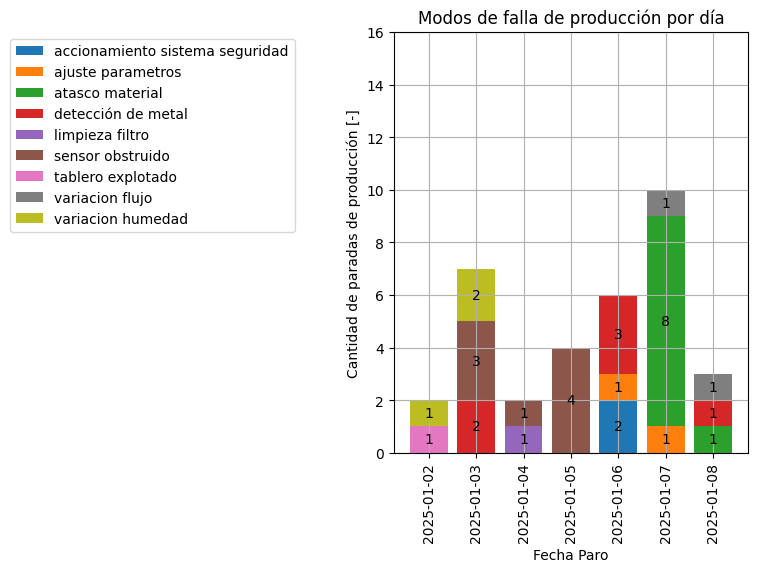

In [20]:
fig, ax = plt.subplots()
fig.tight_layout()  # Adjust layout to prevent clipping of labels
#fig.set_figheight(8)
fig.set_figwidth(4)
#fig.set_size_inches(50, 40) #set plot size
#plot aperturas
amt_dates=len(dates)
bottom = np.zeros(amt_dates) #initial axis for stacked bars plotting
plt.grid() #make grid mesh
max_bottom=0 #to store max of bottoms in construction of bar
for (data_label,weight_count),bar_value_stick in zip(weight_counts.items(),dict_stacked_values.values()): # ,colors_choosen run through dates, rejected per cause per dates, labels of values of rejected per cause per day 
    p = ax.bar(dates, weight_count,label=data_label,bottom=bottom) # ,color=color_cause take bar plot elements: rectangle(attribute 1, attribute 2, ...)
    bottom += weight_count #make new start to plot next top rectangle
    check_bottom=np.max(bottom)
    if check_bottom>max_bottom:
        max_bottom=check_bottom #to generate ylim of causas rechazos
    ax.bar_label(p,labels=bar_value_stick,label_type='center',color="black") #   add bar height str value on bar center
leq=ax.legend(loc="best") #generate legend box for bar plot
# Get the bounding box of the original legend
bb = leq.get_bbox_to_anchor().transformed(ax.transAxes.inverted()) 
# Change to location of the legend. 
xOffset = -1.2
bb.x0 += xOffset
bb.x1 += xOffset*(1.05)
leq.set_bbox_to_anchor(bb, transform = ax.transAxes)
amt_xticks=range(len(dates))
ax.set_xticks(amt_xticks)
ax.set_xticklabels(dates,rotation=90) #rotate x axis labels 90º to be displayed vertically
ax.set_xlabel("Fecha Paro") #name of bar plot x axis
amt_stops_per_fail_mode=np.array(list(weight_counts.values()))
max_y_axis=np.max(amt_stops_per_fail_mode) #get max of all data
ax.set_yticks(np.arange(0, max_y_axis+max_bottom, 2)) #set y axis label values: axis pitch=10 unds
ax.set_ylabel("Cantidad de paradas de producción [-]") #y axis name for bar plot
ax.set_aspect('auto')
imgs_folder="/imgs_reports_daily" #str with name to save plots
imgs_type_folder="/fail_modes_equipments"
imgs_year_folder=f"/year_{dates[0].split("-")[0]}"
imgs_month_folder=f"/month_{dates[0].split("-")[1]}"
img_name="/fail_modes_PRO_per_Type" #name of img file
str_today=datetime.today().strftime('%Y-%m-%d') #asign date of generation
plt.title("Modos de falla de producción por día") #make title
directory_to_save = Path(str(directory)+imgs_folder+imgs_type_folder+imgs_year_folder+imgs_month_folder) # get directory to save plot
directory_to_save.mkdir(exist_ok=True)
plt.savefig(str(directory_to_save)+img_name+dates[0]+"_"+dates[-1]+"_"+str_today+".png", bbox_inches='tight') #store img plot
plt.show()

# Export notebook to make .py script

In [21]:
!jupyter nbconvert --to script bar_plot_fail_modes_PRO_per_day.ipynb

[NbConvertApp] Converting notebook bar_plot_fail_modes_PRO_per_day.ipynb to script
[NbConvertApp] Writing 7497 bytes to bar_plot_fail_modes_PRO_per_day.py
